**EXPLORATION ET VISUALISATION**

In [2]:
import os
import cv2

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
path = r"C:\Users\Olivier\Desktop\DATASCIENTEST\chest_xray\DATA"

In [4]:
fichier = 'data.csv'

df = pd.read_csv(fichier, sep=';')

df.head()

,fichier,format,rep1,rep2,pathogen,height,width,size,mode,mean,median,std,seuil100
0,IM-0001-0001.jpeg,JPEG,test,NORMAL,NaN,1317,1857,2445669,L,131.00,132.0,57.10,70.70
1,IM-0003-0001.jpeg,JPEG,test,NORMAL,NaN,1509,2111,3185499,L,142.45,150.0,60.67,77.07
2,IM-0005-0001.jpeg,JPEG,test,NORMAL,NaN,1837,2031,3730947,L,136.25,138.0,55.40,75.37
3,IM-0006-0001.jpeg,JPEG,test,NORMAL,NaN,1326,1663,2205138,L,148.67,152.0,42.32,84.65
4,IM-0007-0001.jpeg,JPEG,test,NORMAL,NaN,1818,2053,3732354,L,137.70,137.0,53.97,75.99


In [5]:
# Reconstituer le chemin de chaque fichier
df['path'] = path

df['path'] = df['path'].str.cat([df['rep1'], df['rep2'], df['fichier']], sep = os.sep)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fichier   5856 non-null   object 
 1   format    5856 non-null   object 
 2   rep1      5856 non-null   object 
 3   rep2      5856 non-null   object 
 4   pathogen  4273 non-null   object 
 5   height    5856 non-null   int64  
 6   width     5856 non-null   int64  
 7   size      5856 non-null   int64  
 8   mode      5856 non-null   object 
 9   mean      5856 non-null   float64
 10  median    5856 non-null   float64
 11  std       5856 non-null   float64
 12  seuil100  5856 non-null   float64
 13  path      5856 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 640.6+ KB


---

**i) Les données sont déjà réparties dans 3 répertoires principaux: test, train et val**

Voici la répartition obtenue en nombre de fichiers (5856 au total):

In [31]:
soustotal = df[['fichier', 'rep1']].groupby('rep1').agg('count')

soustotal['pourcentage'] = round(soustotal / soustotal.sum() * 100, 2)

soustotal

,fichier,pourcentage
rep1,,
test,624,10.66
train,5216,89.07
val,16,0.27


On trouve actuellement environ 89 % dans le 'train' et 10.7 % pour train

**ii) Dans chaque répertoire principal, les données sont aussi classées dans 2 répertoires NORMAL et PNEUMONIA en guise de label**

Voici la répartition obtenue globalement:

In [33]:
df[['fichier', 'rep2']].groupby('rep2').agg('count')  

,fichier
rep2,
NORMAL,1583
PNEUMONIA,4273


Il y a presque 3 fois plus de cas de pneumonie que de cas normaux. S'agissant de données médicales, cela parait cohérent.

A noter: dans les répertoires 'PNEUMONIA', les fichiers comportent les chaines 'virus' ou 'bacteria' (exemple "person88_bacteria_438"):

In [40]:
pneumonia = df[df['rep2'] == 'PNEUMONIA']

pneumo = pneumonia[['fichier', 'pathogen']].groupby('pathogen').agg('count') 

pneumo['pourcentage'] = round(pneumo / pneumo.sum() * 100, 2)

pneumo

,fichier,pourcentage
pathogen,,
bacteria,2780,65.06
virus,1493,34.94


On a donc 65% de cas 'bactérie' et 35% de cas 'virus'

**iii) On peut également faire quelques analyses sur la taille des images en pixels:**

In [47]:
print('Hauteur moyenne :', round(df['height'].mean(), 2))
print('Hauteur min :', df['height'].min())
print('Hauteur max :', df['height'].max())

print()

print('Largeur moyenne :', round(df['width'].mean(), 2))
print('Largeur min :', df['width'].min())
print('Largeur max: ', df['width'].max())

Hauteur moyenne : 970.69
Hauteur min : 127
Hauteur max : 2713

Largeur moyenne : 1327.88
Largeur min : 384
Largeur max:  2916


- hauteurs comprises entre 127 et 2713, avec une moyenne de 971 pixels environ

- largeurs comprises entre 384 et 2916, avec une moyenne de 1328 pixels environ

On note donc des formats d'image très variables. On a des images présentant des poumons entiers, mais également parfois incomplètes (le haut et le bas des poumons n'apparait pas)

Représentation sous forme de nuage de points:

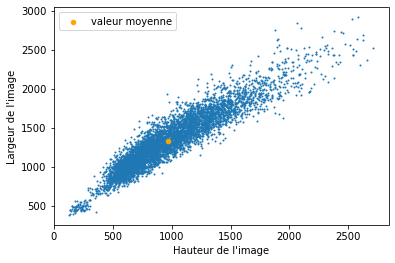

In [55]:
plt.scatter(df['height'], df['width'], s = 1)
plt.scatter(df['height'].mean(), df['width'].mean(), color = 'orange', s = 20, label = 'valeur moyenne')
plt.xlabel("Hauteur de l'image")
plt.ylabel("Largeur de l'image")
plt.legend()
plt.show() 

L'image la plus petite mesure 127 x 384 pixels:

In [49]:
df[df['size'] == df['size'].min()]  

,fichier,format,rep1,rep2,pathogen,height,width,size,mode,mean,median,std,seuil100,path
4306,person407_virus_811.jpeg,JPEG,train,PNEUMONIA,virus,127,384,48768,RGB,123.56,129.0,40.16,83.45,C:\Users\Olivier\Desktop\DATASCIENTEST\chest_x...


L'image la plus grande mesure 2583 x 2916 pixels:

In [50]:
df[df['size'] == df['size'].max()] 

,fichier,format,rep1,rep2,pathogen,height,width,size,mode,mean,median,std,seuil100,path
1858,NORMAL2-IM-1257-0001.jpeg,JPEG,train,NORMAL,NaN,2583,2916,7532028,L,147.21,164.0,77.54,74.07,C:\Users\Olivier\Desktop\DATASCIENTEST\chest_x...


**iv) Images niveaux de gris / couleur / channels**

In [56]:
df['format'].value_counts()

JPEG    5856
Name: format, dtype: int64

Toutes les images sont au format JPEG.

In [57]:
df[['fichier', 'mode']].groupby('mode').agg('count')

,fichier
mode,
L,5573
RGB,283


avec 'L' (8-bit pixels, black and white) et 'RGB' (3x8-bit pixels, true color).

Les images sont majoritairement en noir et blanc (283 sont en couleur).

**v) Planche contact**

Affichage au hasard (samples) de 5 images NORMAL et 5 images PNEUMONIA

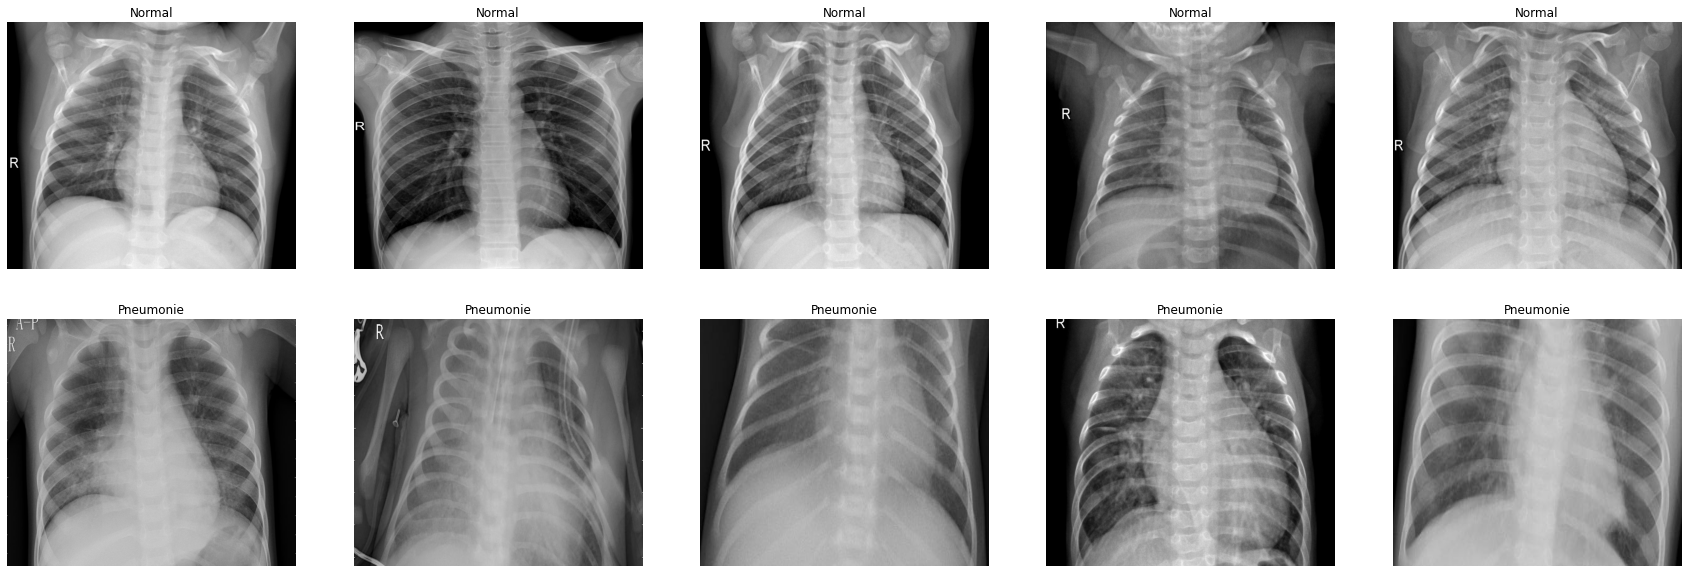

In [59]:
list_images = []

df_normal = df[df['rep2'] == 'NORMAL']

for i in df_normal.sample(n = 5)['path']:
    list_images.append(i)

df_pneumonia = df[df['rep2'] == 'PNEUMONIA']

for i in df_pneumonia.sample(n = 5)['path']:
    list_images.append(i)

f, ax = plt.subplots(2, 5, figsize=(30, 10))

for i in range(10):
    
    img = cv2.imread(list_images[i])
    
    lig = i // 5
    col = i % 5
    
    ax[lig, col].imshow(img)
    
    if i < 5:
        ax[lig, col].set_title("Normal")
    else:
        ax[lig, col].set_title("Pneumonie")
        
    ax[lig, col].axis('off')
    ax[lig, col].set_aspect('auto')
    
plt.show()     

**vi) Histogrammes**

On affiche ci-dessous l'histogramme correspondant aux images de la planche contact. Sont également indiquées les valeurs moyennes et médianes.

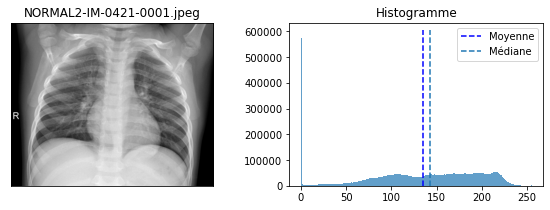

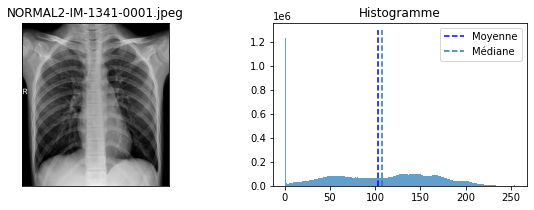

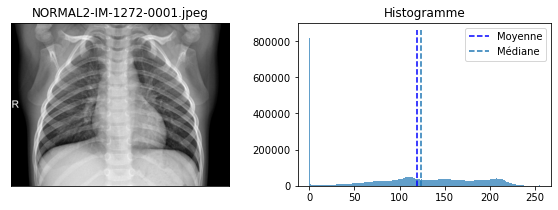

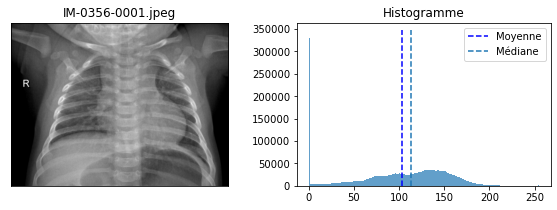

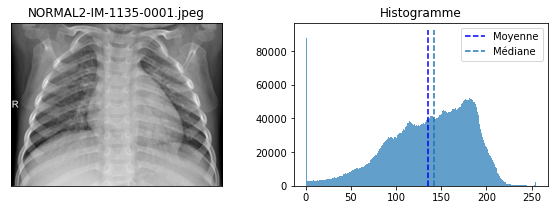

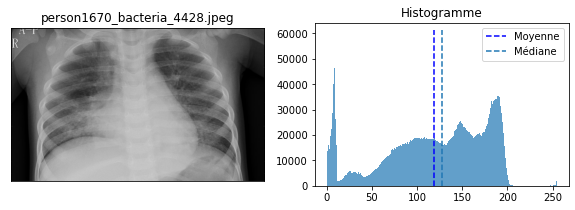

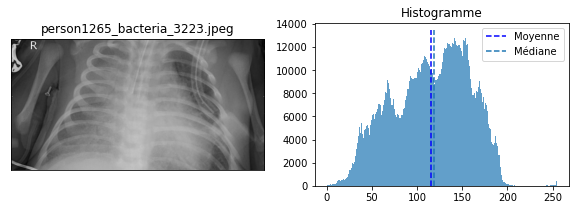

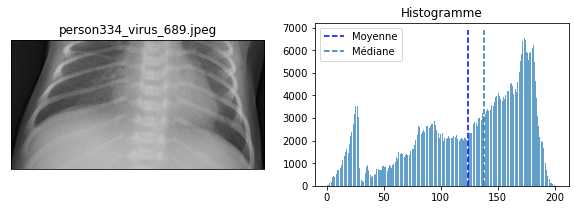

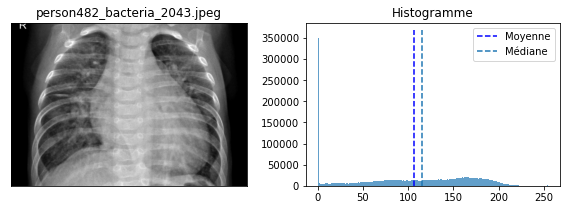

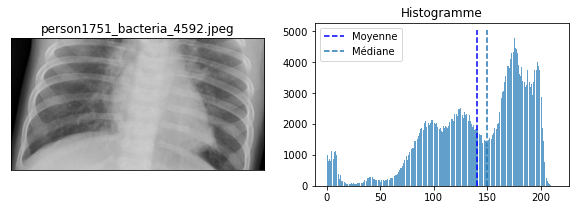

In [61]:
def show_image(image_path):

    img = cv2.imread(image_path)

    titre = os.path.split(image_path)[1]    

    fig = plt.figure(figsize=(10, 3))

    ax = fig.add_subplot(121) # ------------------------
    
    ax.set_title(titre)
    ax.set_aspect('auto')
    ax.set_xticks([])
    ax.set_yticks([])    
    
    ax.imshow(img)
    
    ax = fig.add_subplot(122)
    
    ax.hist(img.ravel(), bins = 256, alpha = 0.7)
    ax.set_title('Histogramme')
    
    bottom, top = plt.ylim() # --------------------------   
    
    ax.vlines(x = np.mean(img), 
              ymin = bottom, ymax = top,
              color = 'blue',
              label = 'Moyenne',
              linestyles  = 'dashed')
    
    ax.vlines(x = np.median(img), 
              ymin = bottom, ymax = top,
              label = 'Médiane',
              linestyles  = 'dashed')    

    ax.set_aspect('auto')    
    
    ax.legend()
    
    plt.show()  
    

for image_path in list_images:
    # print(image_path)
    show_image(image_path)

**vii) Analyse des valeurs seuil**

La valeur seuil a été fixée à 100.

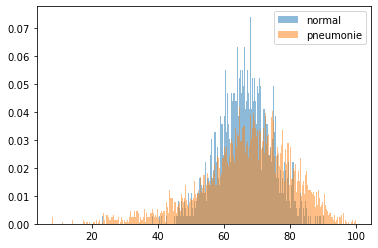

In [151]:
# sample_normal = df_normal['seuil100'].sample(1500)
sample_normal = df_normal['seuil100']

plt.hist(sample_normal, bins = 300, density = True,
         label = 'normal', alpha = 0.5)

# sample_pneumonia = df_pneumonia['seuil100'].sample(1500)
sample_pneumonia = df_pneumonia['seuil100']

plt.hist(sample_pneumonia, bins = 300, density = True,
         label = 'pneumonie', alpha = 0.5)

plt.legend();

In [120]:
import scipy.stats as stats

In [154]:
# Comparaison de variances

print(sample_pneumonia.std())
print(sample_normal.std())

# Comparaison de moyennes

print(sample_pneumonia.mean())
print(sample_normal.mean())

13.72674573636053
8.147483930248432
66.76422185817944
66.33647504737844


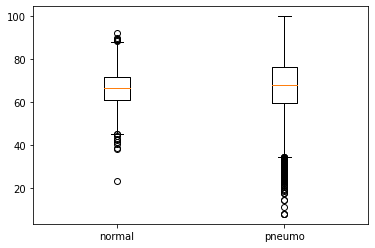

In [156]:
plt.boxplot([sample_normal, sample_pneumonia], labels = ['normal', 'pneumo']);